# Voyage of the Data Ship

Our task is to plot the 10 given FITS (Flexible Image Transport System) files transmitted by the data ship back to Earth after its long voyage across the vastness of space.

We will first plot these FITS files, and then explain the cosmic phenomenon observed in these files captured by the data ship.

In [48]:
#importing necessary libraries

import numpy as np
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt

In [34]:
#Loading the fits files 

mainDir = '../Data/Fits_Files/'

q1 = fits.open(mainDir + 'q1.fits')
q2 = fits.open(mainDir + 'q2.fits')
q3 = fits.open(mainDir + 'q3.fits')
q4 = fits.open(mainDir + 'q4.fits')
q5 = fits.open(mainDir + 'q5.fits')
q6 = fits.open(mainDir + 'q6.fits')
q7 = fits.open(mainDir + 'q7.fits')
q8 = fits.open(mainDir + 'q8.fits')
q9 = fits.open(mainDir + 'q9.fits')
q10 = fits.open(mainDir + 'q10.fits')

In [35]:
print(q1, q2, q3,q4, q5, q6, q7, q8, q9, q10)

#All files clearly only contain primary HDUs

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE3110>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE11D0>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE0910>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE1450>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE25D0>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE2710>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE2850>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE2990>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE16D0>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001F935DE1F90>]


In [25]:
#Let's examine their primary HDU headers

#q10[0].header

#Examining the different headers, we find no useful information, but the fits files were written by skyview which is pretty interesting

In [38]:
#Examining their datas

q10[0].data

#These all seem to be image data's so let's store them to visualize them

array([[3639., 3639., 3453., ..., 3325., 6659., 6659.],
       [3083., 3083., 3083., ..., 3325., 6659., 6659.],
       [3083., 3083., 3083., ..., 3880., 6474., 6474.],
       ...,
       [2861., 3024., 3024., ..., 3329., 3329., 2958.],
       [2861., 3024., 3024., ..., 3121., 3121., 3121.],
       [2861., 3024., 3024., ..., 3121., 3121., 3121.]], dtype='>f8')

In [39]:
#Let's get their image datas to work on them then

q1Data = q1[0].data
q2Data = q2[0].data
q3Data = q3[0].data
q4Data = q4[0].data
q5Data = q5[0].data
q6Data = q6[0].data
q7Data = q7[0].data
q8Data = q8[0].data
q9Data = q9[0].data
q10Data = q10[0].data

#### Now let's start our actual project and tackle the questions one at a time

We will first make an initial plot of our image data, then try to make it look better using various pixel scaling methods and stuff, and we will get a final output image and save it in our plotted files folder.

We will also update a document describing the cosmic phenomenon observed in the image file.

## Q1

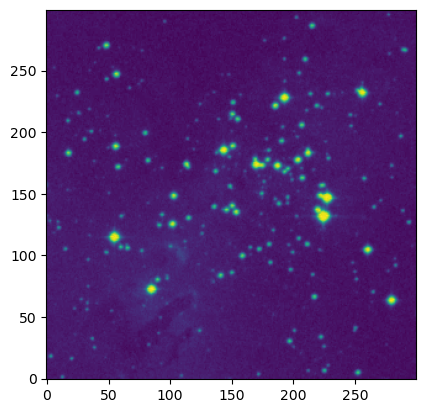

In [41]:
# Let's make an initial plot of q1

plt.imshow(q1Data, origin = 'lower')

plt.show()

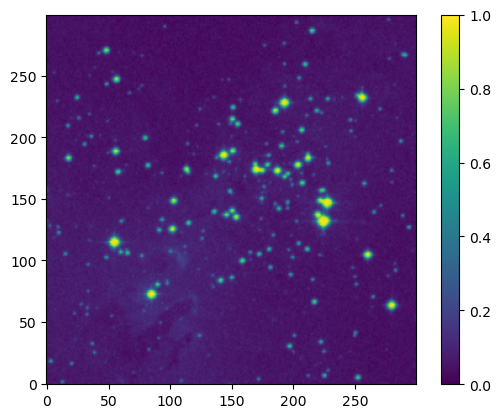

In [43]:
# Interesting inital plot, but let's try scaling methods to make it look better and add a colorbar

q1MinMax = (q1Data - q1Data.min())/(q1Data.max() - q1Data.min())
plt.imshow(q1MinMax, origin = 'lower')
plt.colorbar()
plt.show()

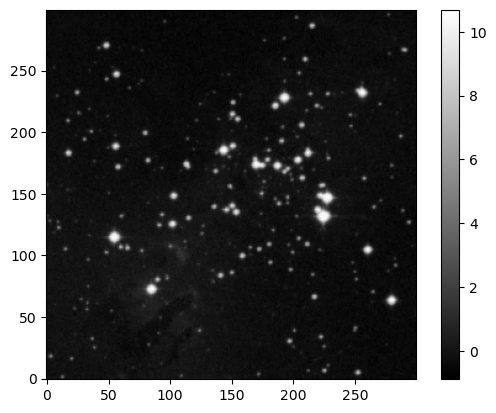

In [46]:
# Doesn't seem to be much better, firstly let's change colormap to grayscale as it would suit the image better, also let's try Z Scaling

q1Z = (q1Data - q1Data.mean())/q1Data.std()

plt.imshow(q1Z, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

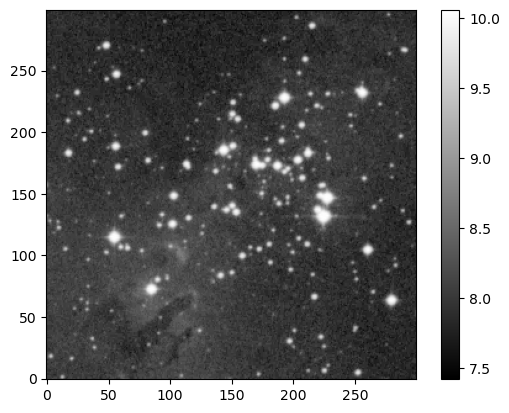

In [49]:
#Still looks quite blurry, let us try log scaling

q1Log = np.log(q1Data)

plt.imshow(q1Log, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

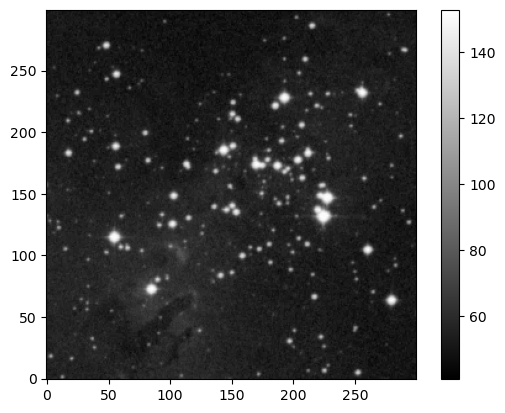

In [ ]:
# That looks better, but also maybe a bit too much? Let's try square root scaling

q1Sqrt = np.sqrt(q1Data)

plt.imshow(q1Z, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

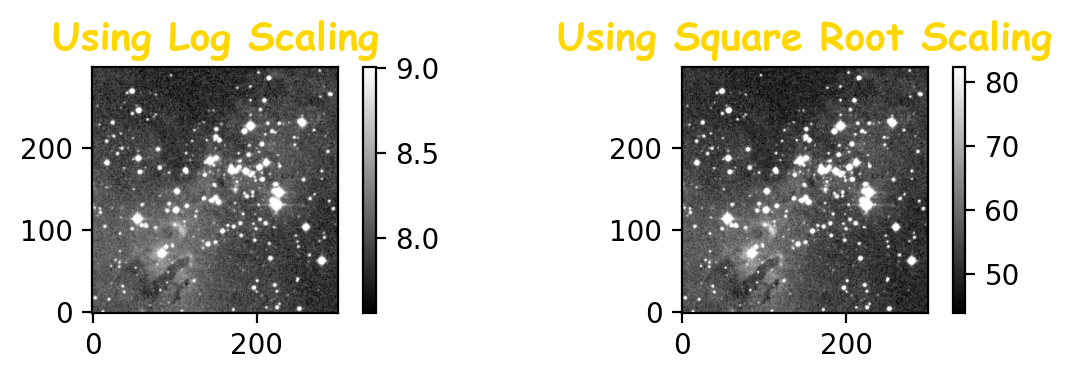

In [63]:
#In my opinion, Square root scaling/streteching seems best, but let's try ZScaleInterval on both log and square root scaled image to compare

zscale = ZScaleInterval()
vminL, vmaxL = zscale.get_limits(q1Log)
vminS, vmaxS = zscale.get_limits(q1Sqrt)

plt.figure(figsize = (6, 2), dpi = 200)

plt.subplot(1, 2, 1)
plt.title("Using Log Scaling", fontdict = {'color': 'Gold', 'weight': 'bold', 'size': 14, 'name': 'Comic Sans MS'})
plt.imshow(q1Log, origin = 'lower', cmap = 'gray', vmin = vminL, vmax = vmaxL)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Using Square Root Scaling", fontdict = {'color': 'Gold', 'weight': 'bold', 'size': 14, 'name': 'Comic Sans MS'})
plt.imshow(q1Sqrt, origin = 'lower', cmap = 'gray', vmin = vminS, vmax = vmaxS)
plt.colorbar()

plt.tight_layout()
plt.show()